# Проект: классификация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [4]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
display(df.info())
print('number of Nulls in "balance" {}'.format(df['balance'].isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


None

number of Nulls in "balance" 25




Данные о клиентах банка:

        age (возраст);
        job (сфера занятости);
        marital (семейное положение);
        education (уровень образования);
        default (имеется ли просроченный кредит);
        housing (имеется ли кредит на жильё);
        loan (имеется ли кредит на личные нужды);
        balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

        contact (тип контакта с клиентом);
        month (месяц, в котором был последний контакт);
        day (день, в который был последний контакт);
        duration (продолжительность контакта в секундах).

Прочие признаки:

        campaign (количество контактов с этим клиентом в течение текущей кампании);
        pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
        previous (количество контактов до текущей кампании)
        poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.


### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
display(df['job'].unique())
display(df['job'].value_counts())


array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [6]:
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
#s= "2 343,00 $"
#print(s.replace(",00", "").replace("$", "").replace(" ", ""))

df['balance'] = df['balance'].apply(lambda x: str(x).replace(",00", "").replace("$", "").replace(" ", ""))
df['balance'] = df['balance'].astype('float')
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Задание 4

In [8]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
print(df['balance'].mean())
print(df['balance'].median())
balance_median = df['balance'].median()
df['balance'] = df['balance'].fillna(balance_median)
print(df['balance'].mean())
print(df['balance'].median())

1529.1290293615875
550.0
1526.9360329690019
550.0


### Задание 5

In [9]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
display(df['job'].value_counts())
display(df['education'].value_counts())

job_mode = df['job'].mode()[0]
education_mode = df['education'].mode()[0]

df['job'] = df['job'].apply(lambda x: job_mode if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: education_mode if x == 'unknown' else x)

display(df['job'].value_counts())
display(df['education'].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [10]:
print(f"средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования {df[(df['job'] == job_mode) & (df['education'] == education_mode)]['balance'].mean()}")


средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования 1598.8829787234042


### Задание 6

lower_bound:-2241.0,  upper_bound:4063.0
Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


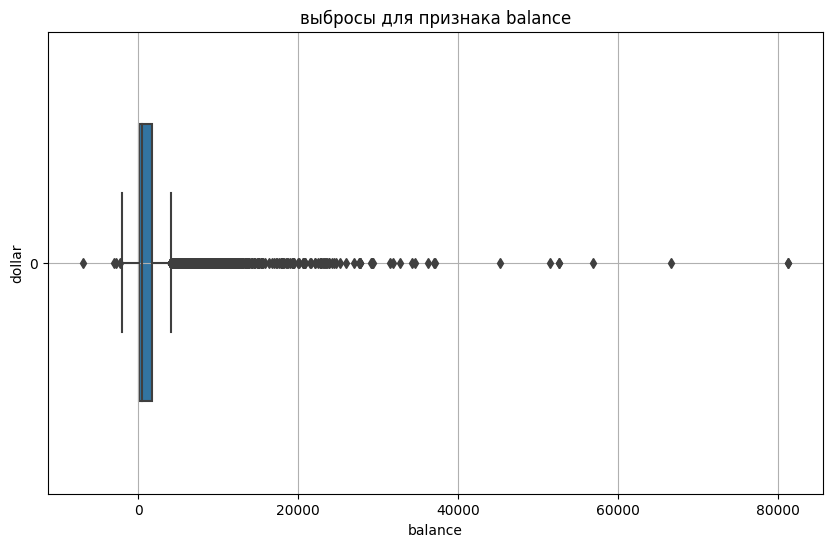

In [11]:
# удалите все выбросы для признака balance
# ваш код

fig = plt.figure(figsize=(10,6))
boxplot = sns.boxplot(
    data=df['balance'],
    orient='h',
    width=0.6,
  )
boxplot.set_title('выбросы для признака balance');
boxplot.set_xlabel('balance');
boxplot.set_ylabel('dollar');
boxplot.grid()
#boxplot.figure.set_size_inches(10, 8)


def outliers_iqr_mod_log(data, column, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[column])
    else:
        x = data[column]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    print(f"lower_bound:{lower_bound},  upper_bound:{upper_bound}" )
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod_log(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')



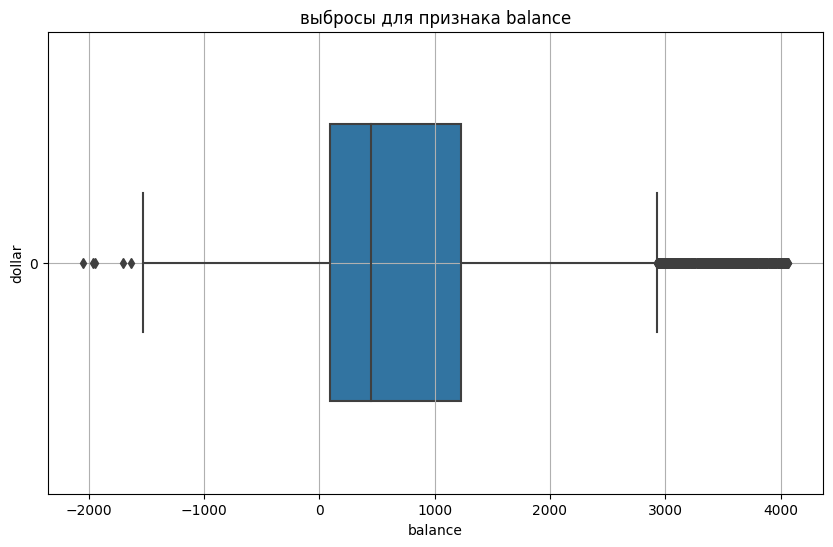

In [12]:
fig = plt.figure(figsize=(10,6))
boxplot = sns.boxplot(
    data=cleaned['balance'],
    orient='h',
    width=0.6,
  )
boxplot.set_title('выбросы для признака balance');
boxplot.set_xlabel('balance');
boxplot.set_ylabel('dollar');
boxplot.grid()
#boxplot.figure.set_size_inches(10, 8)

## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64

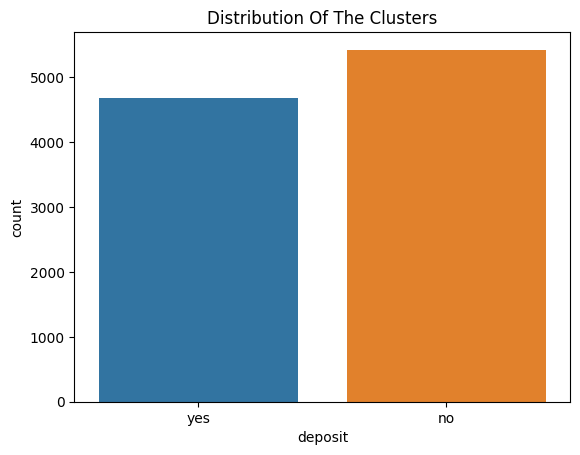

In [19]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
display(cleaned['deposit'].value_counts())
pl = sns.countplot(x=cleaned['deposit'])
pl.set_title("Distribution Of The Clusters")
plt.show()

### Задания 2 и 3

In [24]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
print("максимальный возраст клиента:", cleaned['age'].max())
print("минимальная продолжительность разговора sec", cleaned['duration'].min())

максимальный возраст клиента: 95
минимальная продолжительность разговора sec 2


### Задания 4 и 5

месяцев, в которых проводилась маркетинговая кампания  12


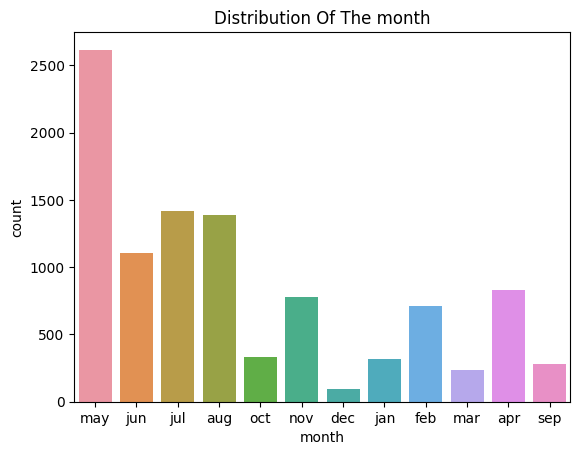

сфер занятости представлено среди клиентов банка  11


management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

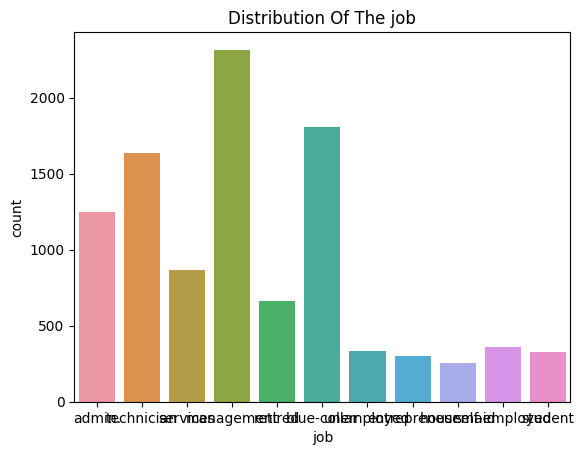

In [45]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
print("месяцев, в которых проводилась маркетинговая кампания ", len(cleaned['month'].unique().tolist()))
pl = sns.countplot(x=cleaned['month'])
pl.set_title("Distribution Of The month")
plt.show()


print("сфер занятости представлено среди клиентов банка ", len(cleaned['job'].unique().tolist()))
display(cleaned['job'].value_counts())
pl = sns.countplot(x=cleaned['job'])
pl.set_title("Distribution Of The job")
plt.show()




емейное положение среди клиентов банка  ['married' 'single' 'divorced']


,marital,counts
0,divorced,1177
1,married,5715
2,single,3213


,marital,count
0,divorced,1177
1,married,5715
2,single,3213


самое распостраненное семейное положение married


married     0.565562
single      0.317961
divorced    0.116477
Name: marital, dtype: float64

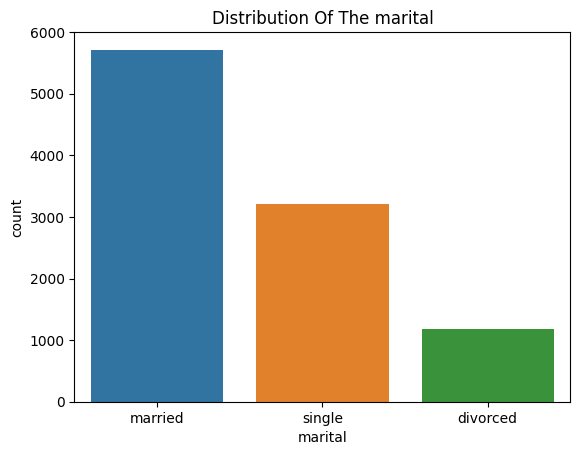

образование среди клиентов банка  ['secondary' 'tertiary' 'primary']


secondary    5517
tertiary     3239
primary      1349
Name: education, dtype: int64

самое распостраненное образование secondary


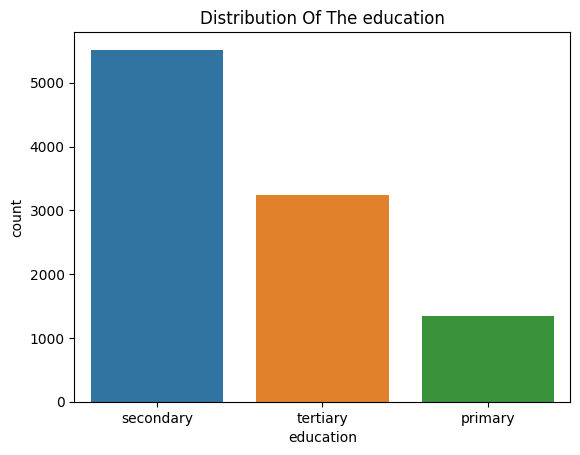

In [157]:
print("емейное положение среди клиентов банка ", cleaned['marital'].unique())
#display(cleaned['marital'].value_counts().sort_values(ascending=False))
display(cleaned.groupby(['marital'])['marital'].size().reset_index(name='counts'))
display(cleaned.groupby(['marital'])['marital'].agg(['count']).reset_index())
print("самое распостраненное семейное положение", cleaned.groupby(['marital'])['marital'].agg(['count']).reset_index().sort_values(by='count', ascending=False).iloc[0][0])

pl = sns.countplot(x=cleaned['marital'])
pl.set_title("Distribution Of The marital")
plt.show()

print("образование среди клиентов банка ", cleaned['education'].unique())
display(cleaned['education'].value_counts())
print("самое распостраненное образование", cleaned.groupby(['education'])['education'].agg(['count']).reset_index().sort_values(by='count', ascending=False).iloc[0][0])

pl = sns.countplot(x=cleaned['education'])
pl.set_title("Distribution Of The education")
plt.show()

In [185]:
display(cleaned['marital'].value_counts().nlargest(n=1) )
print("самое распостраненное семейное положение", cleaned['marital'].mode()[0])
display(cleaned['marital'].value_counts().reset_index())
display(cleaned['marital'].value_counts().reset_index().sort_values(by='marital', ascending=False).iloc[0][0])


married    5715
Name: marital, dtype: int64

самое распостраненное семейное положение married


,index,marital
0,married,5715
1,single,3213
2,divorced,1177


'married'

### Задание 6

статуса предыдущей кампании  ['unknown' 'other' 'failure' 'success']


poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


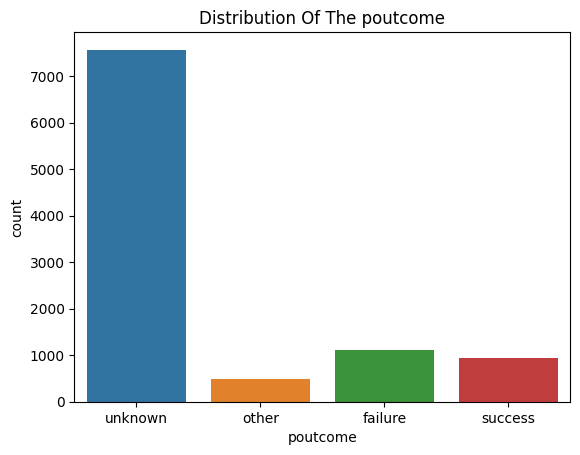

In [179]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
print("статуса предыдущей кампании ", cleaned['poutcome'].unique())
display(cleaned.groupby(['poutcome'])['deposit'].value_counts())
display(cleaned.groupby(['poutcome'])['deposit'].value_counts().unstack())


pl = sns.countplot(x=cleaned['poutcome'])
pl.set_title("Distribution Of The poutcome")
plt.show()

### Задание 7

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


месяцев, в которых проводилась маркетинговая кампания  12


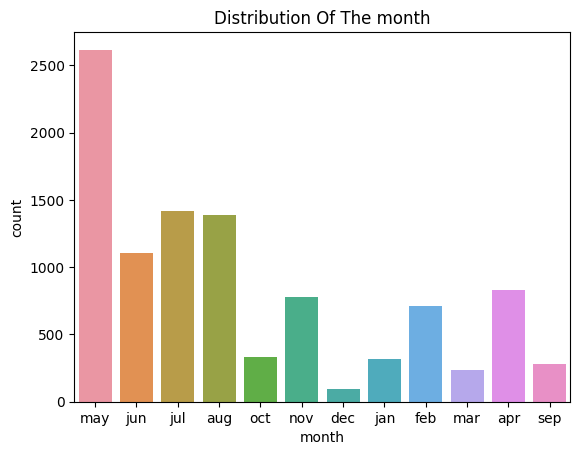

for month may the ratio 0.6786396637371036
for month jun the ratio 0.5489130434782609
for month jul the ratio 0.5895627644569816
for month aug the ratio 0.5595667870036101
for month oct the ratio 0.18507462686567164
for month nov the ratio 0.5846153846153846
for month dec the ratio 0.0967741935483871
for month jan the ratio 0.6081504702194357
for month feb the ratio 0.45557122708039494
for month mar the ratio 0.10126582278481013
for month apr the ratio 0.3819277108433735
for month sep the ratio 0.16546762589928057


In [125]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
display(cleaned.describe(include = 'object'))
print("месяцев, в которых проводилась маркетинговая кампания ", len(cleaned['month'].unique().tolist()))
pl = sns.countplot(x=cleaned['month'])
pl.set_title("Distribution Of The month")
plt.show()

for elem in cleaned['month'].unique().tolist():
    print(f"for month {elem} the ratio {cleaned[cleaned['month'] == elem][cleaned['deposit'] == 'no']['deposit'].count() / cleaned[cleaned['month'] == elem]['deposit'].count()}")

### Задание 8

Создайте новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

        '<30';
        '30-40';
        '40-50';
        '50-60';
        '60+'.

Совет. После создания этой переменной постройте диаграмму (на ваш вкус), которая, с вашей точки зрения, сможет наилучшим образом отобразить различия в количестве открытых/не открытых депозитов для каждой возрастной группы.

In [141]:
def age_range(x):
    if x < 30:
        return 0
    elif x in range(30,40):
        return 1
    elif x in range(40,50):
        return 2
    elif x in range(50,60):
        return 3
    elif x >= 60:
        return 4

print(age_range(53))

3


In [145]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
cleaned['age_range'] = cleaned['age'].apply(age_range)


1    1716
2     938
0     861
3     670
4     496
Name: age_range, dtype: int64

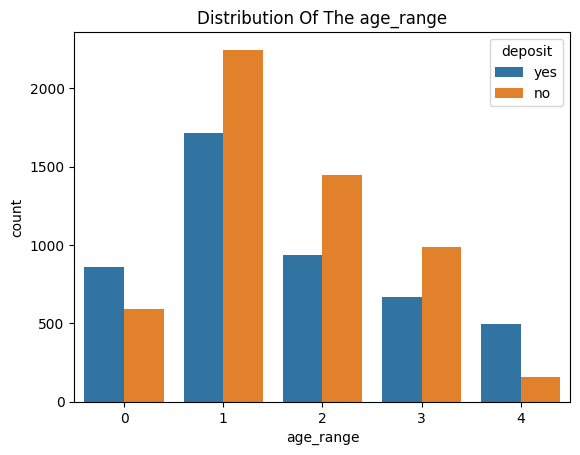

In [170]:
display(cleaned[cleaned['deposit'] == 'yes']['age_range'].value_counts())
#display(cleaned['age_range'])
pl = sns.countplot(x="age_range", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The age_range")
plt.show()

<AxesSubplot: xlabel='age_group', ylabel='count'>

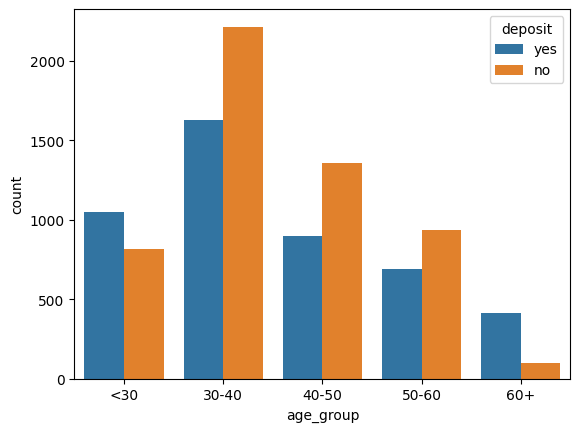

In [168]:

cleaned['age_group'] = pd.cut(cleaned.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=cleaned)

### Задания 9 и 10

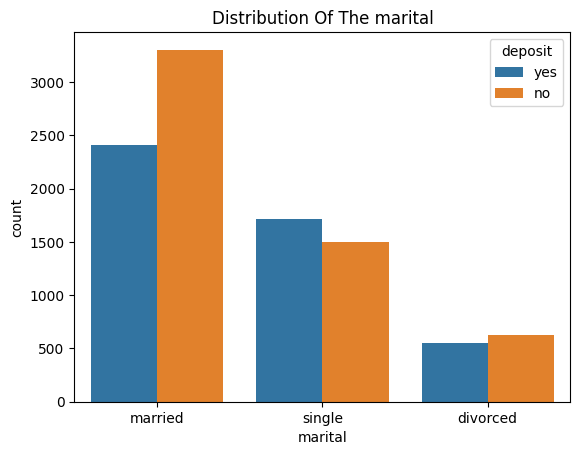

In [171]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
pl = sns.countplot(x="marital", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The marital")
plt.show()

Больше клиентов в статусе married,но склонны открывать в статусе single

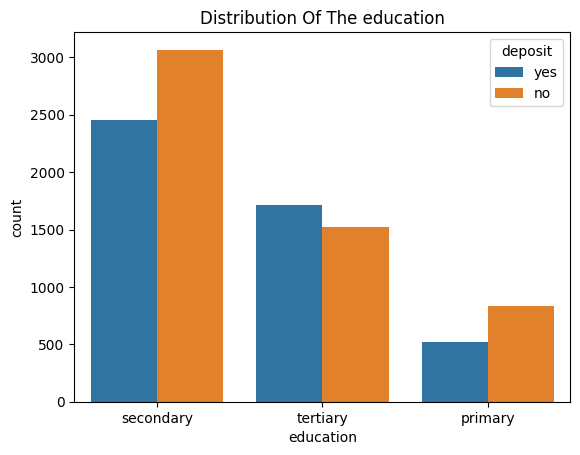

In [172]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
pl = sns.countplot(x="education", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The education")
plt.show()

Больше клиентов в статусе secondary, но склонны открывать в статусе tertiary 

management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

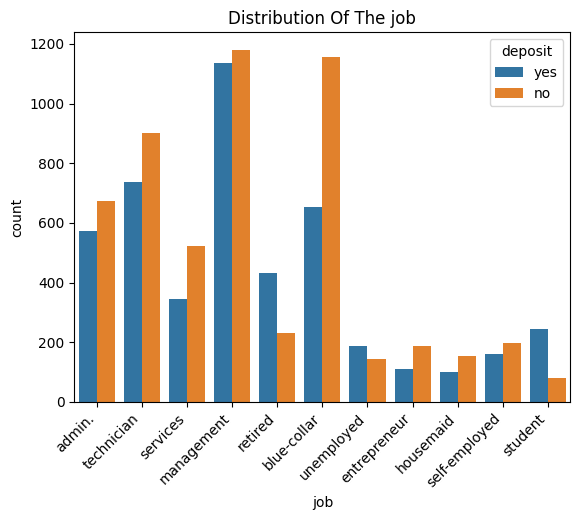

In [175]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
display(cleaned['job'].value_counts())

pl = sns.countplot(x="job", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The job")
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


Больше клиентов в статусе managent и blue-collar,но склонны открывать в статусе retired, unemployed и student

### Задание 11

In [ ]:
#Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. 
# ля каждой части постройте сводную диаграмму по уровню образования и семейному положению. 
# Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? 
# Какой вывод вы можете сделать, исходя из полученных данных?

# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
# Для начала отфильтруйте в отдельные таблицы тех, кто согласился открыть депозит, и тех, кто не согласился. После этого 
# составьте сводные таблицы и визуализируйте их с помощью тепловых карт. 
# Рекомендуется использовать crosstab().


education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


marital   education
divorced  primary        96
          secondary     283
          tertiary      174
married   primary       339
          secondary    1289
          tertiary      784
single    primary        82
          secondary     879
          tertiary      755
Name: deposit, dtype: int64

education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


<AxesSubplot: xlabel='education', ylabel='marital'>

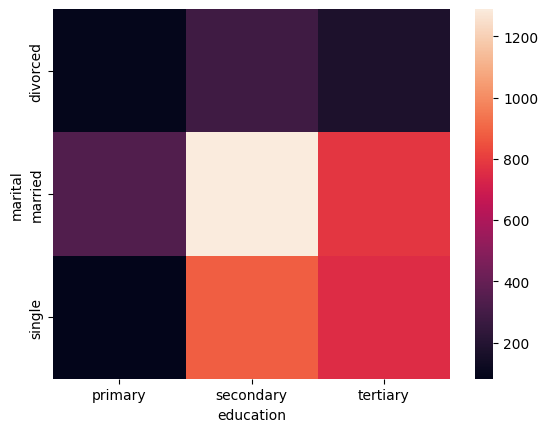

In [213]:
cleaned_open = cleaned[cleaned['deposit'] == 'yes']
cleaned_notopen = cleaned[cleaned['deposit'] == 'no']

display(cleaned_open.pivot_table(values='deposit', index='marital', columns='education', aggfunc='count', margins=False))

display(cleaned_open.groupby(['marital', 'education']).agg('count')['deposit'])

display(pd.crosstab(cleaned_open['marital'], cleaned_open['education']))

sns.heatmap(pd.crosstab(cleaned_open['marital'], cleaned_open['education']))


## Часть 3: преобразование данных

### Задание 1

In [214]:
# преобразуйте уровни образования
#Закодируем категориальные признаки. Так как у нас их мало (Education и Living_With), можем смело использовать LabelEncoder().
LE = LabelEncoder()
cleaned['education'] = LE.fit_transform(cleaned['education'])
cleaned.head()
print(cleaned['education'].sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_range,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,3,50-60
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3,50-60
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2,40-50
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3,50-60
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,3,50-60


### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [ ]:
# создайте дамми-переменные

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [3]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [4]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna